# Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imageio
import skimage
import scipy
import math
from math import floor, ceil
import sklearn
from sklearn.metrics import mean_squared_error

# Loading all Images

In [ ]:
haze = skimage.io.imread('/content/hazy.png')
ece = skimage.io.imread('/content/ECE.png')
box = skimage.io.imread('/content/box.png')
box = cv2.cvtColor(box, cv2.COLOR_BGR2GRAY)
study = skimage.io.imread('/content/study.png')

# **Q1. Image Display**

When the image `ECE.png` (Figure 1a) is displayed with the following code:  
```
import matplotlib.pyplot as plt
from skimage.io import imread
im = imread(`ECE.png`, cmap='gray')
plt.imshow(im)
plt.show()
```
We get a result shown in Figure 1b.

Explain why there is a difference between the actual image
and the displayed image. Find out a way to prevent this from happening.

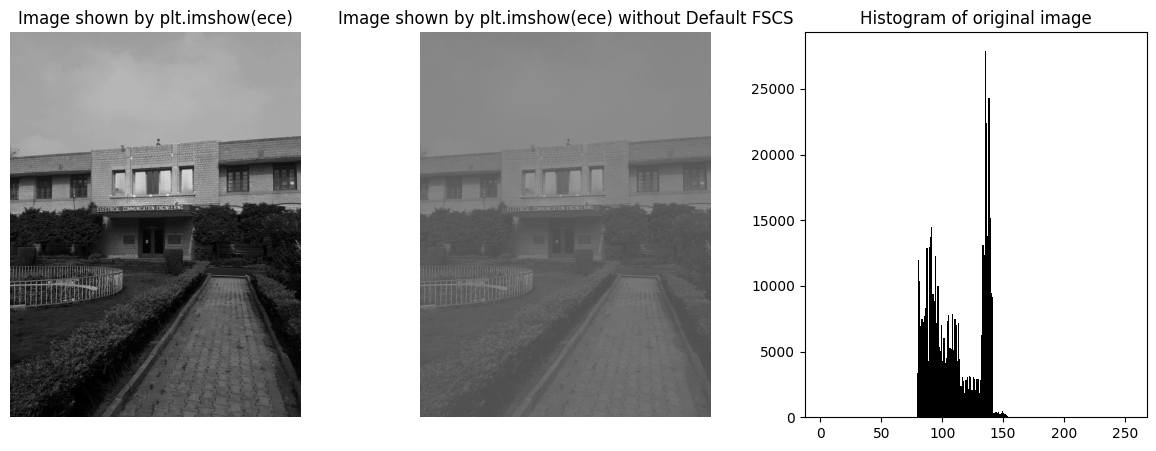

In [ ]:
image_ece = np.array(skimage.io.imread('/content/ECE.png'))

plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.imshow(image_ece,cmap='gray')                                     # plt.imshow(img) does a fscs on the given image by default
plt.axis('off')
plt.title('Image shown by plt.imshow(ece)')
plt.subplot(1,3,2)
plt.imshow(image_ece,cmap = 'gray', vmin = 0, vmax = 255)             # plt.imshow(img) when specified max and min pixel value are 0,255
plt.axis('off')
plt.title('Image shown by plt.imshow(ece) without Default FSCS')
plt.subplot(1,3,3)
plt.hist(image_ece.ravel(),bins = range(256),color = 'k')
plt.title('Histogram of original image')
plt.show()

# **Q2. Contrast Stretching:**
(a) Write functions to apply histogram equalization and power-law (gamma) transforms on agreyscale image.

(b) Apply histogram equalization on `haze.png`

(c) Power-law (gamma) transformation: $$J(i, j) = I(i, j)^γ$$

Find the optimal parameter $γ ∈ (0, 5]$ that minimizes the mean squared error between the histogram equalized image from **(b)** and the gamma transformed image. Use this $γ$ to transform and display the input image.

Visualize the histogram before and after each operation and comment on how they relate to the resulting images.

---
| Function | Gamma Transform             | Function | Histogram Equalization |
|----------|-----------------------------|----------|------------------------|
| Input    | Image, Transform Parameters | Input    | Image                  |
| Output   | Enhanced Image              | Output   | Enhanced Image         |

In [ ]:
# Defining Histogram Function
def histogram(A,n_bins):
  hist = np.zeros(n_bins)
  for i in A.ravel():
    hist[int(i)]+=1
  return hist

# Defining CDF Function
def CDF(A,n_bins):
  cdf = np.zeros(n_bins)
  hist = histogram(A,n_bins)
  for i in range(n_bins):
    cdf[i] = np.sum(hist[:i+1],dtype='int')
  return cdf

In [ ]:
# Defining Histogram Equalization

def Hist_Eq(pic):

  cdf_pic = CDF(pic,256)/(len(pic)*len(pic[0]))                                 #CDF of a given pic

  p = np.zeros((len(pic),len(pic[0])),dtype = 'float')

  for i in range(len(pic)):
    for j in range(len(pic[i])):
      p[i][j] = cdf_pic[pic[i][j]]

  p = p*255                                                                     # Converting intensities from 0-1 to 0-255
  eq_pic = np.zeros((len(pic),len(pic[0])),dtype='int')                         #Zero array for equalized pic
  for i in range(len(pic)):
    for j in range(len(pic[0])):
      eq_pic[i][j] = p[i][j]

  return np.array(eq_pic,dtype='int')

In [ ]:
# Demo Code Histogram Equalization

haze_equalized = Hist_Eq(haze)

In [ ]:
# Defining Gamma Function

def Gamma_Transform(Image):

  image_equalized = Hist_Eq(Image)/255
  Image = Image/255

  # Finding Optimal Gamma

  error = []                                                                      # Error Array
  gamma_resolution = 0.01                                                         # Step size between two iterations in gamma
  gamma_list = np.arange(gamma_resolution,5 + gamma_resolution,gamma_resolution)
  for gamma in gamma_list:
      error.append(mean_squared_error(image_equalized,np.float_power(Image,gamma)))

  optimal_gamma = gamma_list[np.argmin(error)]                              # Gamma corresponding to min error

  print('Optimal Gamma is ' + str(round(optimal_gamma,3)))
  print('Min MSE is ' + str(round(min(error),4)))
  plt.figure(figsize = (20,5))
  plt.plot(gamma_list,error)
  plt.vlines(optimal_gamma, ymin = 0, ymax = max(error),color='red',linestyle = 'dashed')

  Transformed_Image = np.float_power(Image, optimal_gamma)

  return np.array(Transformed_Image*255,dtype = 'int')

Optimal Gamma is 3.01
Min MSE is 0.0045


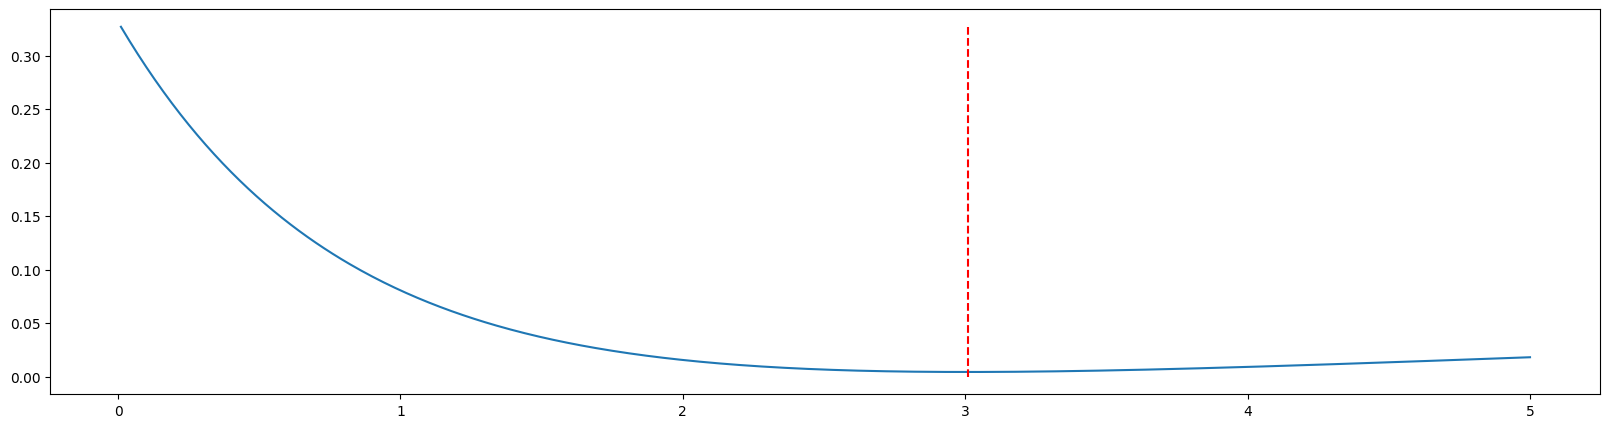

In [ ]:
haze_gamma_transformed = Gamma_Transform(haze)

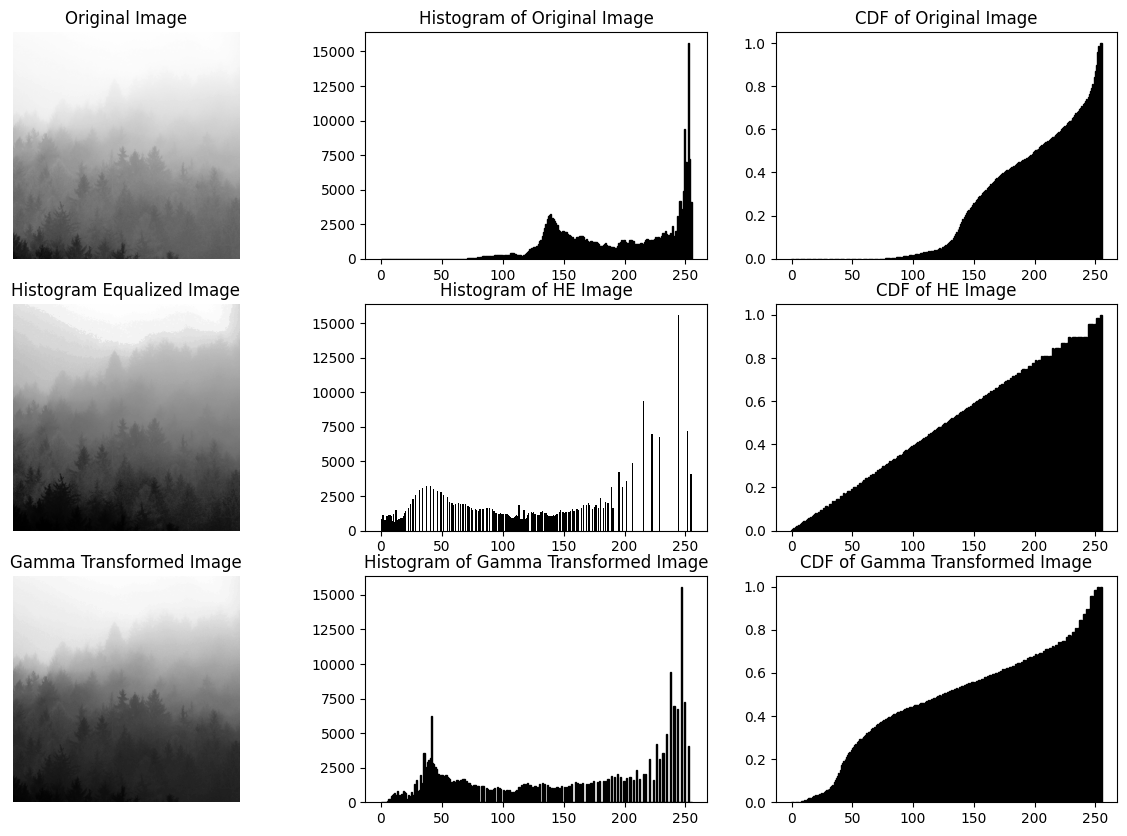

In [ ]:
# Result Cell

plt.figure(figsize = (15,10))
plt.subplot(3,3,1)
plt.imshow(haze, cmap = 'gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(3,3,2)
plt.hist(haze.ravel(), bins = range(256),color = 'k', edgecolor = 'k')
plt.title('Histogram of Original Image')
plt.subplot(3,3,3)
plt.bar(np.arange(256),CDF(haze,256)/max(CDF(haze,256)),color = 'k', edgecolor = 'k')
plt.title('CDF of Original Image')
plt.subplot(3,3,4)
plt.imshow(haze_equalized, cmap = 'gray')
plt.axis('off')
plt.title('Histogram Equalized Image')
plt.subplot(3,3,5)
plt.hist(haze_equalized.ravel(), bins = range(256),color = 'k')
plt.title('Histogram of HE Image')
plt.subplot(3,3,6)
plt.bar(np.arange(256),CDF(haze_equalized,256)/max(CDF(haze_equalized,256)),color = 'k', edgecolor = 'k')
plt.title('CDF of HE Image')
plt.subplot(3,3,7)
plt.imshow(haze_gamma_transformed, cmap = 'gray')
plt.axis('off')
plt.title('Gamma Transformed Image')
plt.subplot(3,3,8)
plt.hist(haze_gamma_transformed.ravel(), bins = range(256),color = 'k', edgecolor = 'k')
plt.title('Histogram of Gamma Transformed Image')
plt.subplot(3,3,9)
plt.bar(np.arange(256),CDF(haze_gamma_transformed,256)/max(CDF(haze_gamma_transformed,256)),color = 'k', edgecolor = 'k')
plt.title('CDF of Gamma Transformed Image')
plt.show()

# **Q3. Image rotation:**
Write a function to rotate the image `box.png` in the clockwise direction by
5° and counter-clockwise by 30° using both nearest neighbor or bilinear interpolation. Make sure the rotated image is completely visible and not cropped. Observe the edges of the first image after rotation and comment on the difference between each interpolation method.

---

| Function | Rotate Image                                    |
|----------|-------------------------------------------------|
| Input    | Image, Degree of Rotation, Interpolation Method |
| Output   | Rotated Image                                   |

In [ ]:
def Image_Rotate(Image,degree,interpolation_method):

  m = len(Image)
  n = len(Image[0])

  def Image_value(Img,i,j):                                                     # Defining Image as a function which returns 0 when indices are outside range
    if i>=len(Img) or j>=len(Img[0]) or i<0 or j<0:
      return 0
    else:
      return Img[i][j]

  degree = math.pi*degree/180                                                   # Converting degree to radian

  # Creating new image array with new dimensions
  if degree>=0:

    m_new = round(m*math.cos(degree)) + round(n*math.sin(degree))
    n_new = round(m*math.sin(degree)) + round(n*math.cos(degree))

  else:
    m_new = round(m*math.cos(degree)) - round(n*math.sin(degree))
    n_new = -1*round(m*math.sin(degree)) + round(n*math.cos(degree))

  rotated_img = np.zeros(shape = (m_new,n_new))

  # Rotating Image
  for i in range(len(rotated_img)):
    for j in range(len(rotated_img[0])):

      if degree>=0:
        i_,j_ = i , j - round(m*math.sin(degree)) + 1                           # For clockwise rotation
      else:
        i_ , j_ = i + round(n*math.sin(degree)) + 1 ,j                          # For anticlockwise rotation

      x = i_*math.cos(degree) - j_*math.sin(degree)
      y = i_*math.sin(degree) + j_*math.cos(degree)

      x1, x2 = floor(x), floor(x)+1
      y1, y2 = floor(y), floor(y)+1

      B11 = (x2-x)*(y2-y)
      B12 = (x2-x)*(y-y1)
      B21 = (x-x1)*(y2-y)
      B22 = (x-x1)*(y-y1)

      if interpolation_method == 'bilinear interpolation':

        pixel_value = min(max(int(B11*Image_value(Image,x1,y1) + B12*Image_value(Image,x1,y2) + B21*Image_value(Image,x2,y1) + B22*Image_value(Image,x2,y2)),0),255)

      elif interpolation_method == 'nearest neighbour':

        pixel_value = Image_value(Image,round(x),round(y))

      rotated_img[i][j] = pixel_value

  return np.array(rotated_img)

In [ ]:
# Demo Code

rotate_by_5_clk_nn = Image_Rotate(box,5,'nearest neighbour')
rotate_by_30_anticlk_nn = Image_Rotate(box,-30,'nearest neighbour')
rotate_by_5_clk_bi = Image_Rotate(box,5,'bilinear interpolation')
rotate_by_30_anticlk_bi = Image_Rotate(box,-30,'bilinear interpolation')

Text(0.5, 1.0, 'Rotation by 30° anticlockwise using bilinear interpolation')

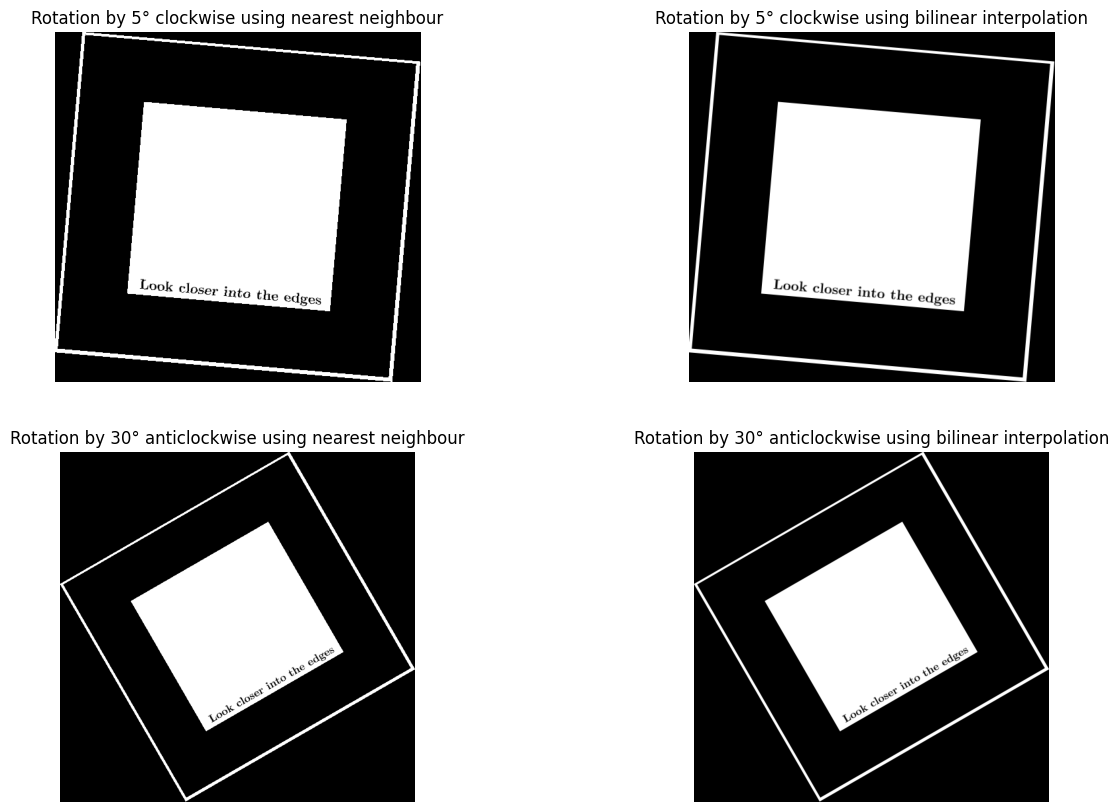

In [ ]:
#Result Cell

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.imshow(rotate_by_5_clk_nn ,cmap = 'gray')
plt.axis('off')
plt.title('Rotation by 5° clockwise using nearest neighbour')

plt.subplot(2,2,2)
plt.imshow(rotate_by_5_clk_bi ,cmap = 'gray')
plt.axis('off')
plt.title('Rotation by 5° clockwise using bilinear interpolation')

plt.subplot(2,2,3)
plt.imshow(rotate_by_30_anticlk_nn ,cmap = 'gray')
plt.axis('off')
plt.title('Rotation by 30° anticlockwise using nearest neighbour')

plt.subplot(2,2,4)
plt.imshow(rotate_by_30_anticlk_bi ,cmap = 'gray')
plt.axis('off')
plt.title('Rotation by 30° anticlockwise using bilinear interpolation')

# **Q4. Spatial Filtering:**

Apply high-boost filtering on the image `study.png` to sharpen it.

Use square averaging of size 5 to perform unsharp masking. Choose the scaling constant for the high pass component as k = 2.5.

Comment on what you observe. Now, blur the input image with a square average filter of size 3 and perform high boost filtering again.

Comment on the difference in output compared to the previous case.
---
| Function | High-Boost Filtering    |
|----------|-------------------------|
| Input    | Image, Scaling Constant |
| Output   | Sharpened Image         |

In [ ]:
# Defining High Boost Filtering Function

def High_Boost_Filtering(Image,k):

  blur_kernel_sq_5 = [[1/25 for i in range(5)] for j in range(5)]

  blurred_image_sq_5 = scipy.signal.convolve2d(Image,blur_kernel_sq_5, mode = 'same', boundary = 'fill')

  sharpened_image_on_original = np.zeros(shape = (len(Image),len(Image[0])))

  for i in range(len(Image)):
    for j in range(len(Image[0])):
      sharpened_image_on_original[i][j] = min(max(Image[i][j] + k*(Image[i][j] - blurred_image_sq_5[i][j]),0),255)


  return sharpened_image_on_original

In [ ]:
# Demo Code

blur_kernel_sq_3 = [[1/9 for i in range(3)] for j in range(3)]

sharpened_original_image = High_Boost_Filtering(study,2.5)
blurred_image_sq_3 = scipy.signal.convolve2d(study,blur_kernel_sq_3, mode = 'same', boundary = 'fill')
sharpened_blurred_image_sq_3 = High_Boost_Filtering(blurred_image_sq_3,2.5)

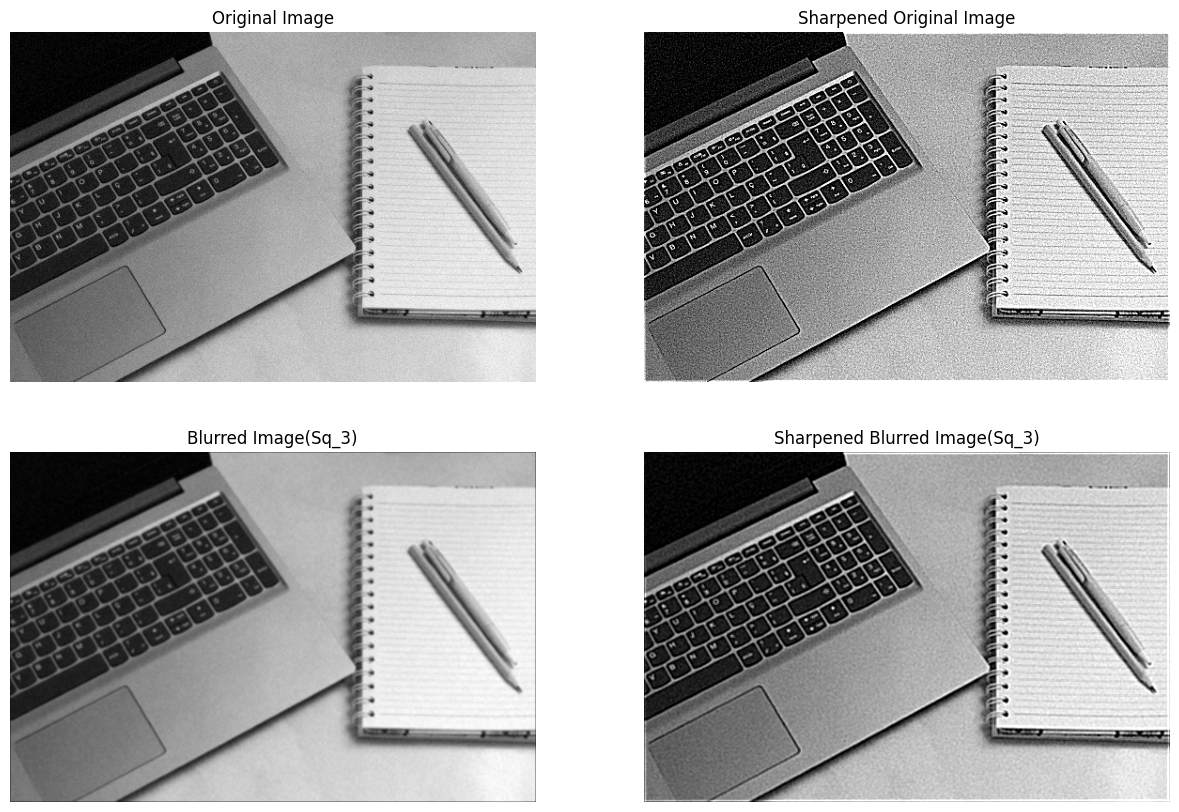

In [ ]:
# Result Cell

plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.imshow(study, cmap = 'gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(sharpened_original_image, cmap = 'gray')
plt.axis('off')
plt.title('Sharpened Original Image')
plt.subplot(2,2,3)
plt.imshow(blurred_image_sq_3, cmap = 'gray')
plt.axis('off')
plt.title('Blurred Image(Sq_3)')
plt.subplot(2,2,4)
plt.imshow(sharpened_blurred_image_sq_3, cmap = 'gray')
plt.axis('off')
plt.title('Sharpened Blurred Image(Sq_3)')
plt.show()